# Project Description:
    the next project will analyze data of gym customers and predict customer churn to fight them.

## Table of contents
* [Opening data](#start)
* [Exploratory Data Analysis](#eda)
    * [Processing missing values](#missing)
    * [Processing duplicate data](#duplicates)
    * [Mean and standard deviation of the variables](#mean_all)
    * [Study the mean values by churn](#mean_churn)
    * [Plot features by churn](#plot_churn)
    * [Correlation matrix](#corr_matrix)
* [Build a model to predict user churn](#step3)
* [Create user clusters](#step4) 
    * [Dendogram](#dendo)
    * [K-Means](#kmeans)
    * [Mean feature values](#mean_feature)
    * [Plot distributions](#plot_distr)
    * [Churn rate per cluster](#churn_rate)
* [Conclusions and recommendations](#step5)


## Preparing Data:  <a id='start'></a>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
from datetime import datetime
import numpy as np
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mth
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/gym_churn_us.csv')
except:
    data = pd.read_csv("C:/Users/NELLY/Downloads/gym_churn_us.csv")

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.tail()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Our data includes 4000 rows, 14 variables including the target variable- churn. Seems like there are no missing values.
Columns 0-4, 6, 13 are dichotomous numeric variables that were coded already, and are suitable for our analysis.
Needed change- Change all column names to lowercase for simplicity


In [6]:
data.columns = data.columns.str.lower()

## Exploratory Data Analysis: <a id='eda'></a> 

### Missing values: <a id='missing'></a> 

In [7]:
data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

### Duplicates: <a id='duplicates'></a> 

In [8]:
data.duplicated().sum()

0

### Study the mean and standard deviation of the variables: <a id='mean_all'></a>

In [9]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [10]:
binary_cols=['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
for i in binary_cols:
    print(i,':\n', data[i].value_counts())

gender :
 gender
1    2041
0    1959
Name: count, dtype: int64
near_location :
 near_location
1    3381
0     619
Name: count, dtype: int64
partner :
 partner
0    2053
1    1947
Name: count, dtype: int64
promo_friends :
 promo_friends
0    2766
1    1234
Name: count, dtype: int64
phone :
 phone
1    3614
0     386
Name: count, dtype: int64
group_visits :
 group_visits
0    2351
1    1649
Name: count, dtype: int64


* All the categorical variables in the data indeed include just two values- 0 and 1.
* The mean of gender is 0.51 - the are almost the same share for males and females 
* The mean of near_location is 0.84 - meaning that most of the customers live close to the gym.
* The mean of partner is 0.48 - meaning its almost the same share of customers who work for partner companies and those who are not.
* The mean of phone is 0.9 - almost all customers provided phone number
* the mean of group_visits is 0.4 - meaning that 40% of the customers are participating in group sessions.
* 50% of customers have 1 month contract 
* The average customers' age is 29 and it varies from 18 to 41.
* Customers spend additionally 146 USD.
* On average customers have 4 months to the end of the contract.
* Customers go to the gym almost 2 times a week in average.

### Study the mean values by churn: <a id='mean_churn'></a>

In [11]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Churn=0, meaning that these are customers that did not leave while churn=1 represents customers who left the gym.
* In both groups we see similar share of females and males.
* Customers who live near the gym are less likely to leave compared to those who live far.
* Customers who work in partner companies are less likely to leave compared to those who are not.
* Customers who used a friends' promo code are less likely to leave compared to those who do not have friends in the gym.
* Customers who are loyal to the gym have much longer contract periods.
* Loyal customers go more to group sessions.
* The average age of clients who left the gym is 26, younger than the average of the clients who did not leave the place.
* Customers who did not leave spend more in average.
* Customers who left have in average 1.6 months to the end of the contract while those who have more time (5.2 in average) do not stop coming.
* Customers who left in general, and in the last month, came to workout less times than those who did not leave.


### Plot features by churn: <a id='plot_churn'></a>

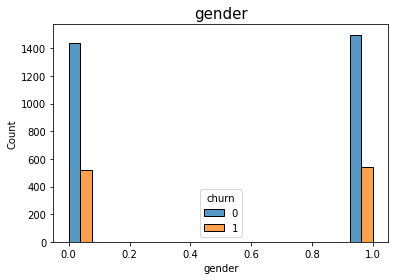

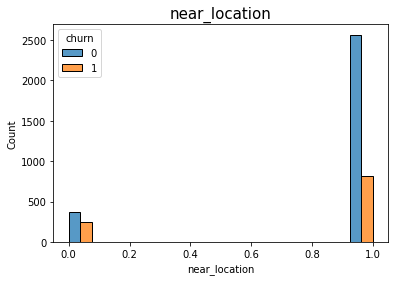

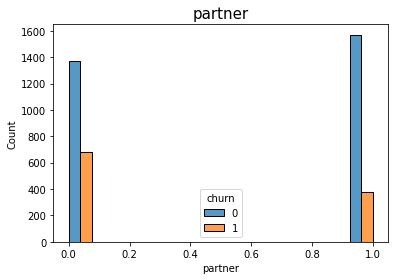

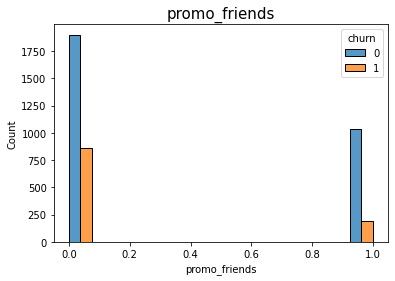

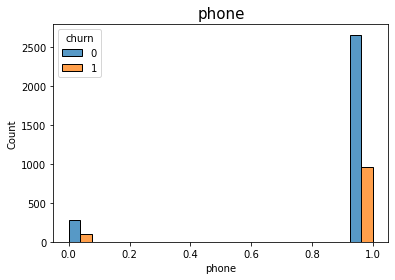

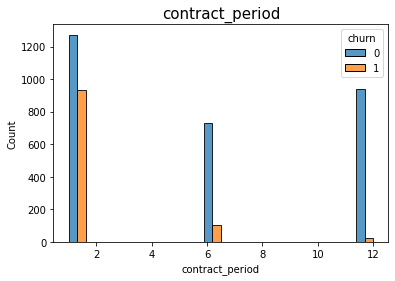

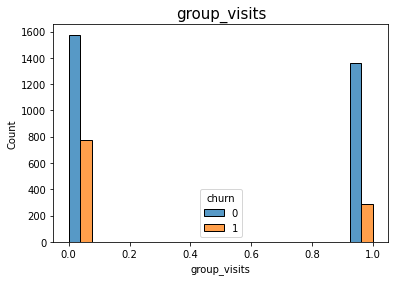

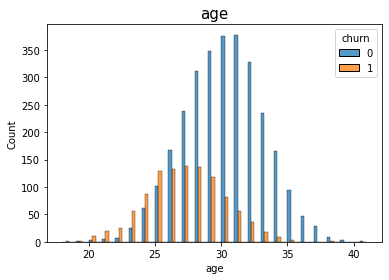

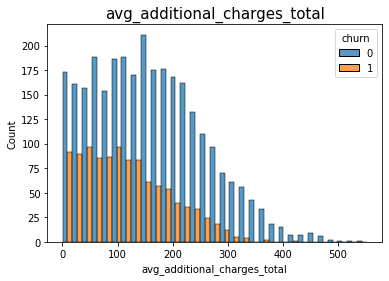

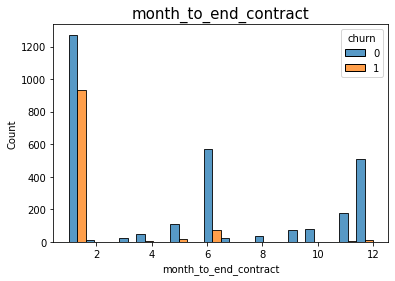

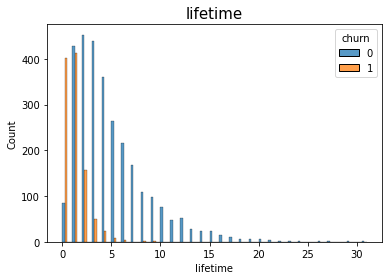

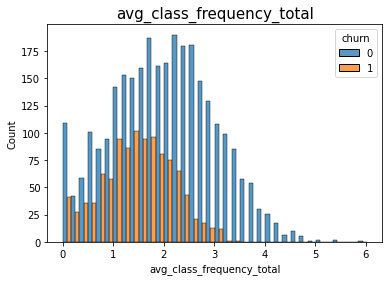

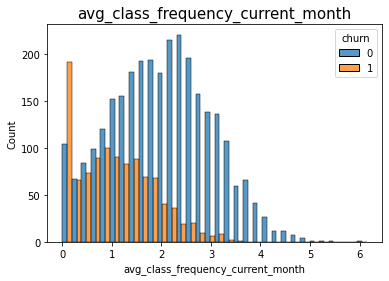

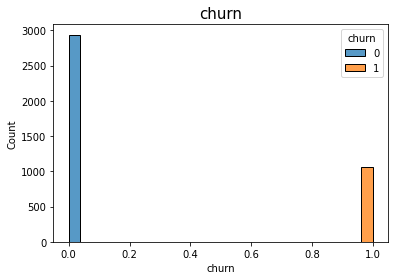

In [12]:
for i in data.columns:
    sns.histplot(data=data, x=i, hue='churn',multiple="dodge")
    plt.title(i,fontsize=15)
    plt.show()

Based on the plots we do not see outliers that might affect the further calculations.

### Correlation Matrix: <a id='corr_matrix'></a>

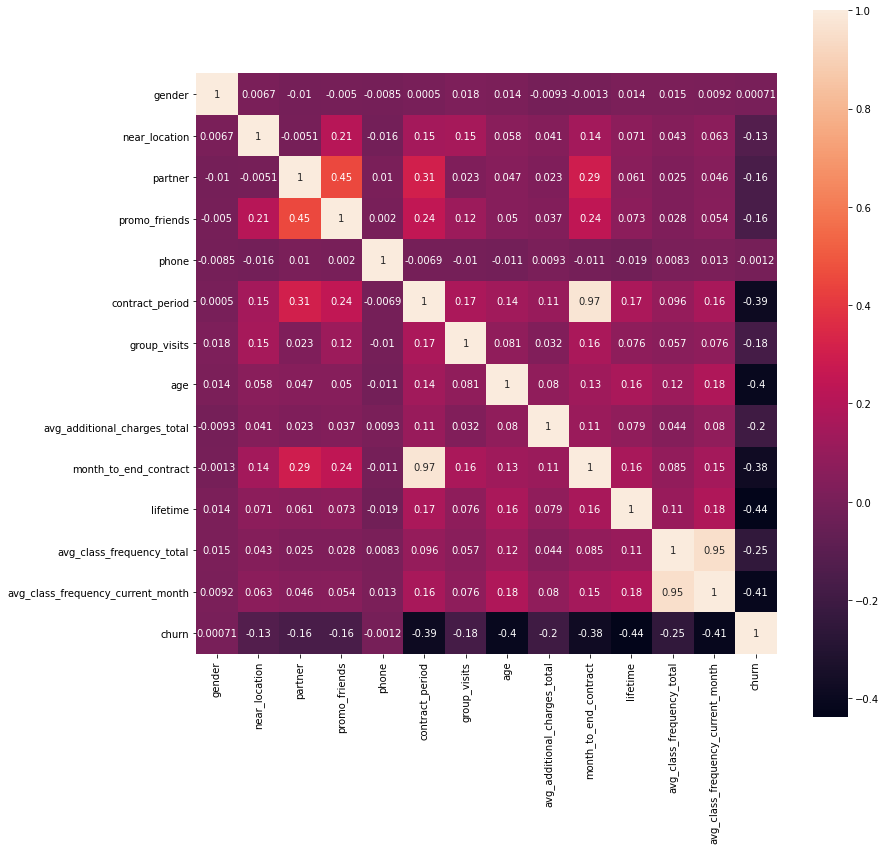

In [13]:
corr= data.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr, annot=True, square=True)
plt.show()

* month_to_end and contract_period have positive correlation of 0.97. This relationship is not suprising since most of the customers have one month contract thus they also have one month left.
* avg_class_frequency_current_month and avg_class_frequency_totalhave positive correlation of 0.95 which is logical too, and suggests that customers are consistent in their habbits.
* churn, the target variable have a few moderate positive and negative correlations with some features.

## Build a model to predict user churn: <a id='step3'></a> 

In [14]:
#dividing to features and terget variable:
X = data.drop(['churn'], axis=1)
y = data['churn']

# dividing into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# create scaler object:
scaler = StandardScaler()

# train scaler and transform the metric for train set:
X_train_st = scaler.fit_transform(X_train)

# apply feature metric on test set:
X_test_st = scaler.transform(X_test)

# function predicting the model:
def make_prediction(model, X_train, y_train, X_test, y_test):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model: {}'.format(str(model).split('(', 1)[0]))
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))

In [15]:
make_prediction(LogisticRegression(random_state=0), X_train, y_train, X_test, y_test)

Model: LogisticRegression
Accuracy: 0.92
Precision: 0.88
Recall: 0.80


In [16]:
make_prediction(RandomForestClassifier(random_state=0), X_train, y_train, X_test, y_test)

Model: RandomForestClassifier
Accuracy: 0.92
Precision: 0.88
Recall: 0.83


Data was divided to 80/20 where 80% of the data is being used to train the model and the rest 20% used to test it and compare the prediction with the actual values. Since churn is a binary variable, we have built a binary classification models to predict it's value for the next month.

Comparing logistic regression with random forest, we see that the accuracy is the same  - 0.92 which is close to 1 and represents good accuracy for both models.

The precision represents the share of true predictions from the positive predictions (target class), logistic regression have precision of 0.89 while random forest provides a value of 0.88, meaning the the first model is better than the second but only marginally.

The recall represents the number of real class 1 objects we found in the model, here random forest provides better metric - 0.83 compared to logistic regression-0.81.

Since the cost for false negative is low in our case, we can conclude that logistic regression model is better fit than the random forest.

## Create user clusters: <a id='step4'></a> 

### Dendogram: <a id='dendo'></a>

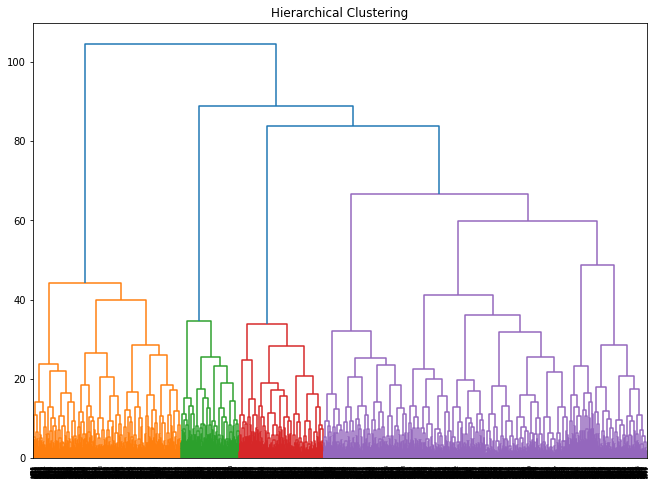

In [17]:
#standardize the data:
x_sc = scaler.fit_transform(X)

#building matrix of distances based on the standardized feature matrix:
linked = linkage(x_sc, method='ward')

#plot a dendogram:
plt.figure(figsize=(11,8))
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering', size=12)
plt.show()

### K-Means: <a id='kmeans'></a>

In [23]:
#train clustering model with k-means algorithm:
km = KMeans(n_clusters=5, random_state=0)
labels= km.fit_predict(x_sc)

#calculate silhouette score:
sil_score = silhouette_score(x_sc, labels)
print('Silhouette score: ',round(sil_score, 2))

Silhouette score:  0.14


The silhouette calculated is equal to 0.14. The closer the value to +-1 is the better, this value suggests that the extent the object is similar to his cluster rather than to another cluster, is pretty low when we set 5 clusters.

### Mean feature values: <a id='mean_feature'></a>

In [19]:
#mean feature values for clusters:
data['cluster']=labels
clustered_data = data.groupby('cluster').mean()
clustered_data.T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


* All customers belong to cluster 2 live far from the gym while in all the other clusters the majority if not all, live near the gym.
* In cluster 0 most of the customers work in partner companies, more than half have used a friend's promo code and have signed mainly to the annual contract, in contrast to other clusters. Additionally, customers is this cluster particiapte more in group sessions, pay higher additional charges (along with cluster 4) and have much more time to the end of their contract.
* Cluster 4 customers go twice more in average more than other clusters to the gym, overall and in the current month.
* Clusters 2, 3 have highest average scores for churn - meaning that customers that belong to them tend to leave the gym more than those who belong to other clusters and especially those in cluster 0. 

### Plot distributions: <a id='plot_distr'></a>

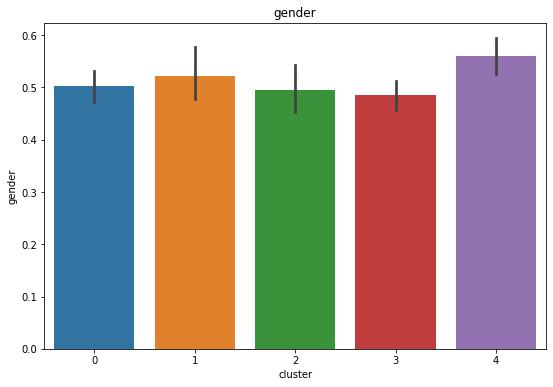

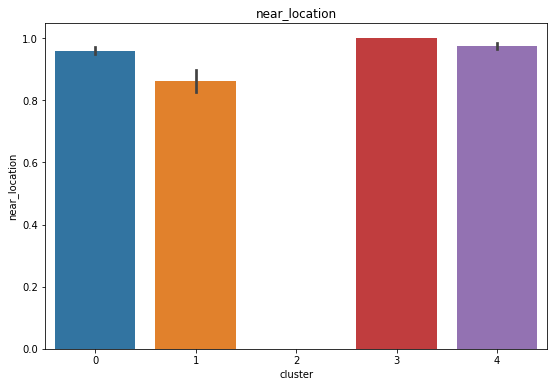

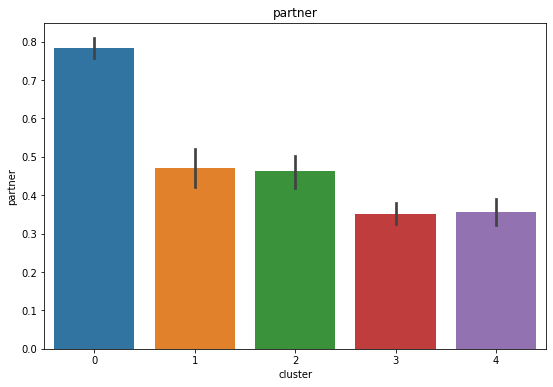

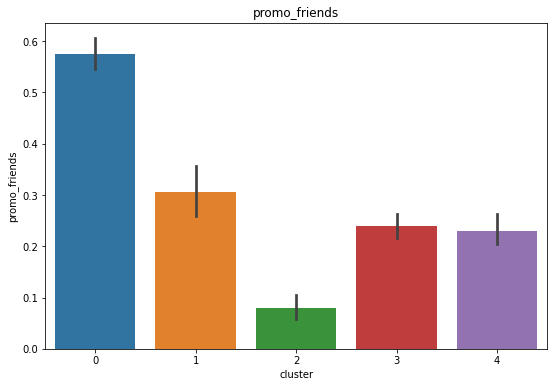

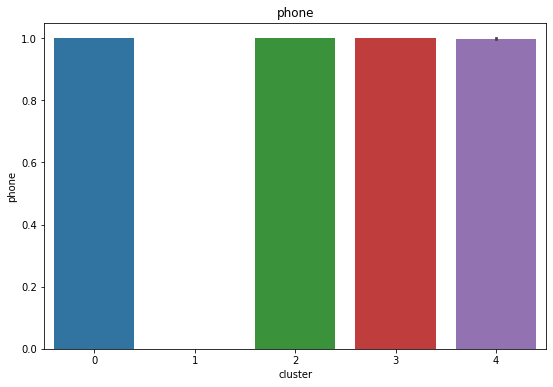

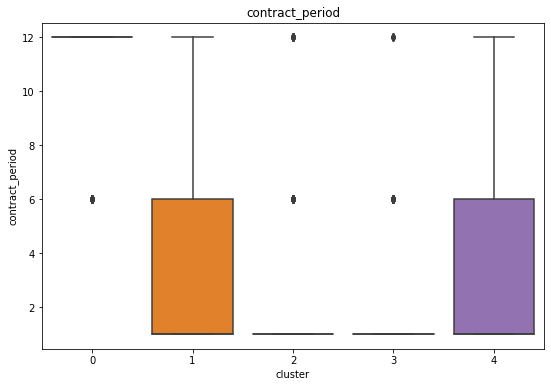

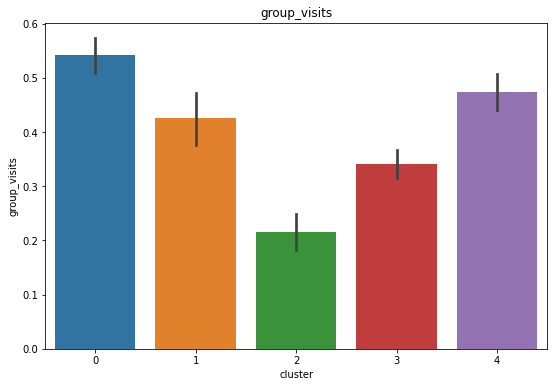

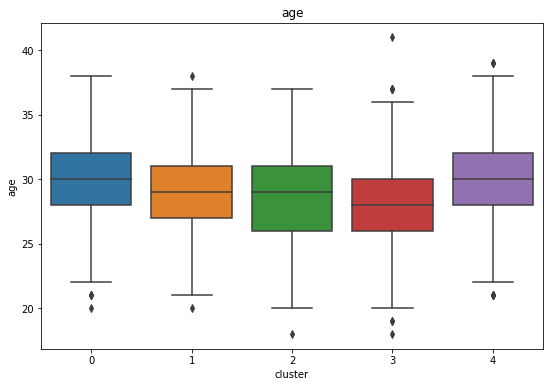

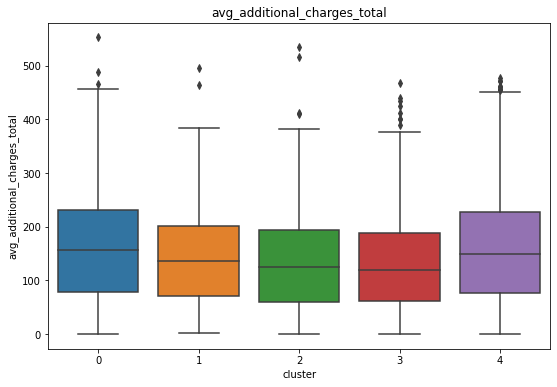

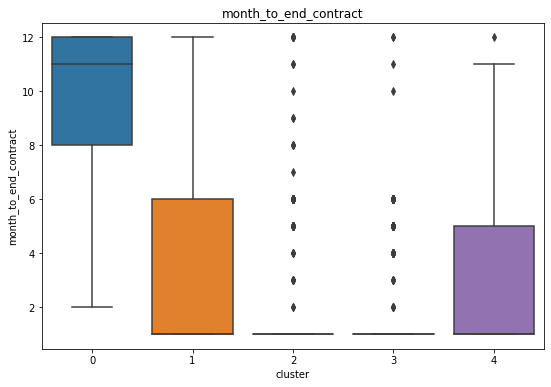

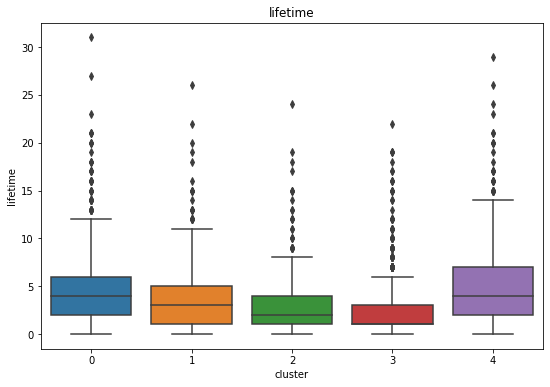

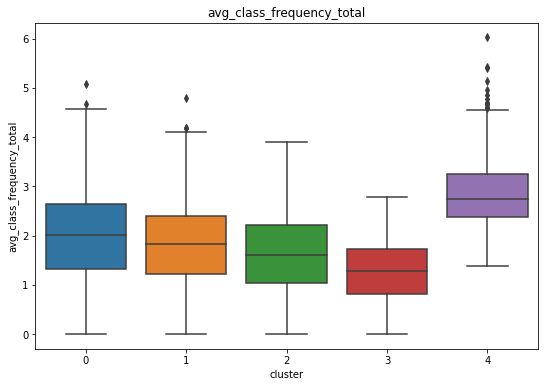

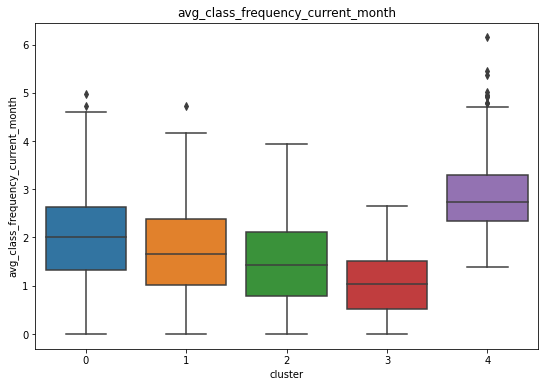

In [20]:
#plot dist. of features by clusters:
for col in X_train.columns:
    plt.figure(figsize=(9, 6))
    plt.title(col, fontsize=12)
    if data[col].nunique()>2:
        sns.boxplot(data=data, x='cluster' , y=data[col] )
    else:
        sns.barplot(data=data, y=col, x='cluster') 

Seems like clusters 2 and 3 have similar trends in many variables, while cluster 0 and 4 looks different.

### Churn rate per cluster: <a id='churn_rate'></a>

In [21]:
#claculate churn rate per cluster:
churn_pivot = data.groupby('cluster')['churn'].agg({'count', 'sum'})
churn_pivot['churn_rate']= round(churn_pivot['sum']/churn_pivot['count'],2)
churn_pivot

,count,sum,churn_rate
cluster,,,
0,1010,28,0.03
1,385,103,0.27
2,505,224,0.44
3,1262,649,0.51
4,838,57,0.07


As stated before, customers from clusters 2 and 3 are much more likely to leave the gym (44% and 51% respectively) compared to other clusters.

Based on the plots and table above we suggest that the features below are important for predicting churn:
1. contract_period - longer contract results in lower retention rates.
2. near_location, partner - living near the gym or working in partner company (meaning its probably located nearby) reduces the chance to leave the gym.
3. promo_friends - signing with friend's code results in lower retention rates, which is logical since it means the customers have a friend to workout with.


## Conclusions and recommendations: <a id='step5'></a> 

The data included 4000 rows and 14 variables - 13 features and a target variable.
After checking for missing values and duplicates we used two models on the dataset in order to predict churn. 
Comparing random forest model and logistic regression, the later provided better metrics.
Then we created clusters and visualized them, based on the plots and tables we have found few features that we believe that plays important roles in their influence on customer's churn chances:
* near_location and partner - both features imply that the customer work or live nearby, thus the gym may be more accessible for them and that reduces the chance to leave.
* promo_friends and group_visits - we see that customers that have friends who also go to the same gym, or customers that participate in group sessions are less likely to leave the gym. These features represent the power of socialization on the persistence.
* avg_class_frequency (total, current month) and avg_additional_charges_total - according to these features, customers who participate more (2 visits per week compared to 1 visit) and spend more money in the gym are more loyal and less inclined to leave.

Based on the conclusions below we recommend the gym to:
> Focus on customers who live nearby or work in partner companies or have friends who go to the gym, when acquiring new customers.

> Boost group trainings, try to encourage customers to come twice a week to the gym and offer discounts to enhance their average additional charges.